In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/higgs-boson/training.zip
/kaggle/input/higgs-boson/HiggsBosonCompetition_AMSMetric_rev1.py
/kaggle/input/higgs-boson/random_submission.zip
/kaggle/input/higgs-boson/test.zip


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,15
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [3]:
df_train = pd.read_csv('/kaggle/input/higgs-boson/training.zip')
df_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
df_test = pd.read_csv('/kaggle/input/higgs-boson/test.zip')
df_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [5]:
df_submission = pd.read_csv('/kaggle/input/higgs-boson/random_submission.zip')
df_submission.head()

,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,b
3,350003,510885,s
4,350004,455944,s


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

# Feature Engineering

[]

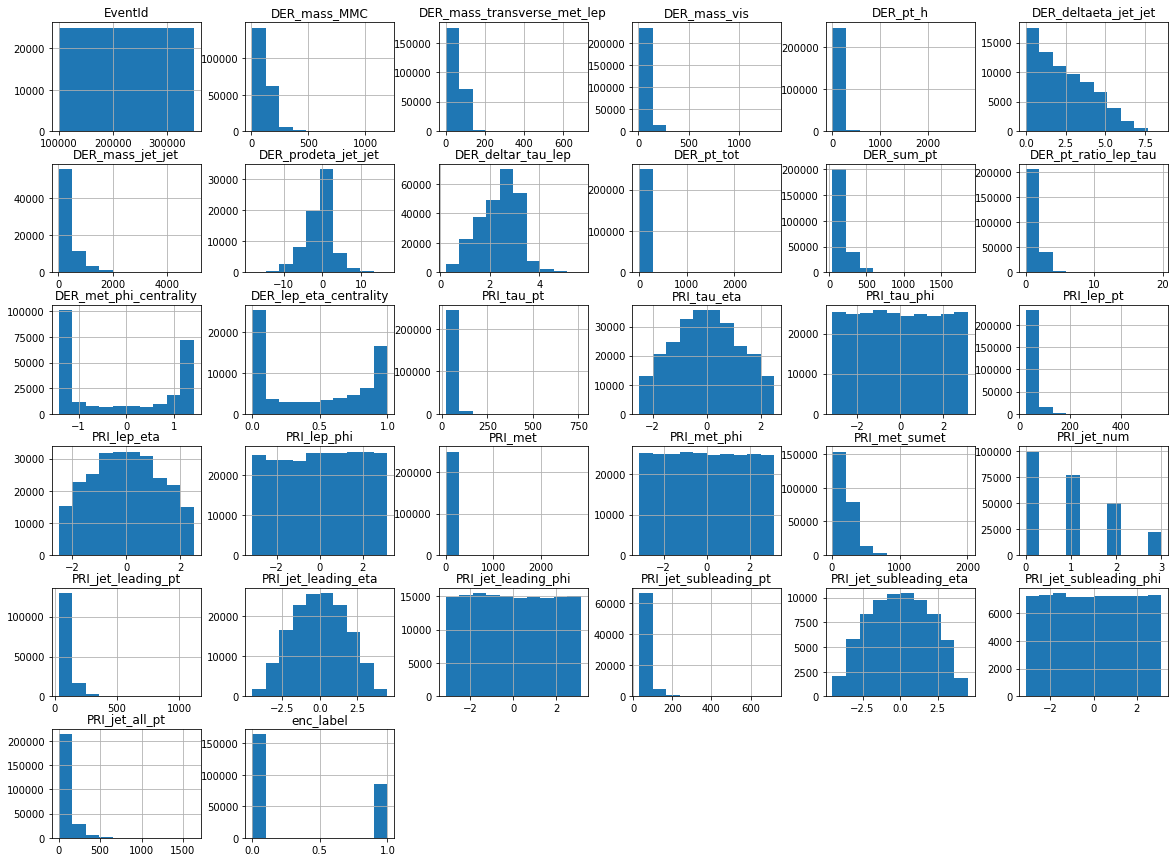

In [27]:
df_train.replace(-999, np.nan).hist()
plt.plot()

# Encode label column for classification
Since there are two labels we will be binarizing the labels for convenience

In [7]:
df_train['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [8]:
df_train['enc_label'] = 0
df_train.loc[df_train['Label'] == "s", 'enc_label'] = 1 

In [9]:
df_train.drop(['Label', 'Weight', 'EventId'], axis=1, inplace=True)

# Split to train test sets

In [10]:
X = df_train.drop('enc_label', axis=1)
y = df_train['enc_label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Modelling

In [12]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)


In [13]:
preds = clf.predict(df_test)

In [14]:
subm=pd.read_csv("../input/higgs-boson/random_submission.zip")
subm.head(2)
subm.Class = preds
labels = {1: "s", 0: "b"}
subm['Class'] = subm['Class'].map(labels) 
subm['RankOrder'] = subm['Class'].argsort().argsort() + 1 


In [15]:
subm

,EventId,RankOrder,Class
0,350000,1,b
1,350001,453360,s
2,350002,453359,s
3,350003,453358,s
4,350004,250969,b
...,...,...,...
549995,899995,250970,b
549996,899996,250971,b
549997,899997,250972,b
549998,899998,37824,b


In [16]:
subm.to_csv("submission.csv",index=False)